In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('Glaucoma.csv')
df.replace('?',-99999,inplace=True)
df.drop(['id'],axis=1,inplace=True)

X=np.array(df.drop(['classes'],axis=1))
y=np.array(df['classes'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,21):

    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    y_pred = classifier.predict(X_test)

[[160   4]
 [  3  78]]
Accuracy score of train J48: 96.0352422907489
Accuracy score of test REPTree: 97.14285714285714
⚠️ Warning: knn has only 1 values, expected 20.


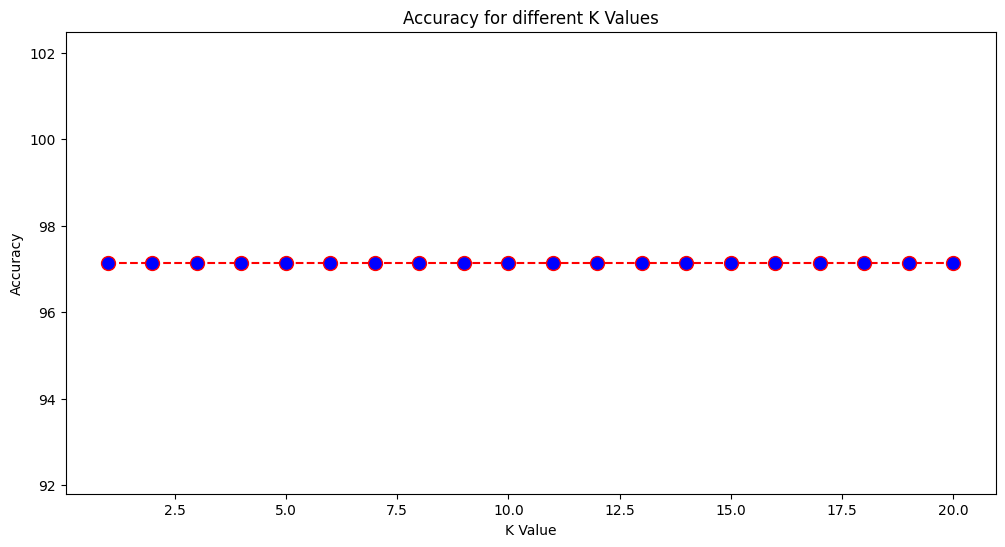

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize knn as an empty list before appending
knn = []

# Compute confusion matrix
cm_KNN = confusion_matrix(y_test, y_pred)
print(cm_KNN)

# Accuracy calculations
print("Accuracy score of train J48:", accuracy_score(y_train, trained_model.predict(X_train)) * 100)
print("Accuracy score of test REPTree:", accuracy_score(y_test, y_pred) * 100)

# Append test accuracy to knn
knn.append(accuracy_score(y_test, y_pred) * 100)

# Check if knn has enough values for plotting
if len(knn) < 20:
    print(f"⚠️ Warning: knn has only {len(knn)} values, expected 20.")

# Ensure knn has 20 values before plotting
while len(knn) < 20:
    knn.append(knn[-1])  # Fill with last accuracy value to avoid errors

# Plot accuracy for different values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), knn, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different K Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

trained_model=classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train )
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)
print("Accuracy score of train Random Tree")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test Random Tree")
print(accuracy_score(y_test, y_pred)*100)

[[160   4]
 [  4  77]]
Accuracy score of train Random Tree
96.47577092511013
Accuracy score of test Random Tree
96.73469387755102


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
df = pd.read_csv('Glaucoma.csv')
df.replace('?', -99999, inplace=True)
df.drop(['id'], axis=1, inplace=True)

In [ ]:
X = df.drop(['classes'], axis=1)
y = df['classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


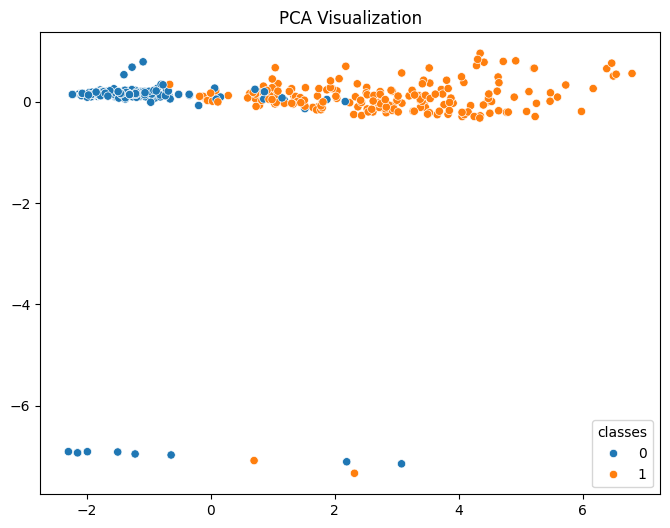

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train)
plt.title('PCA Visualization')
plt.show()


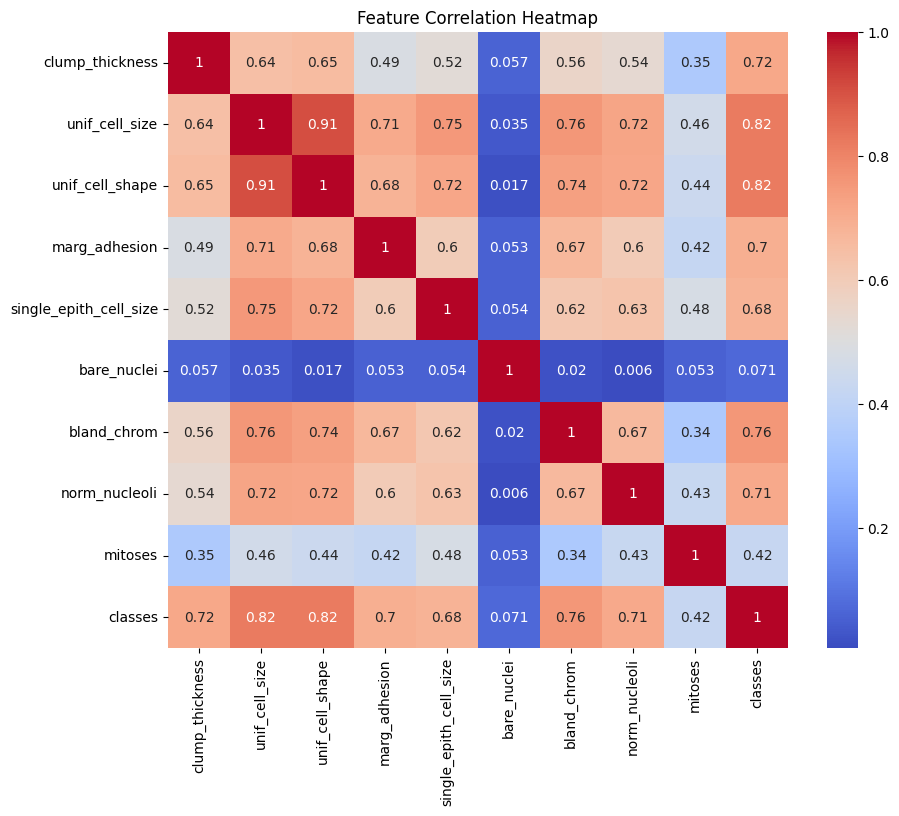

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

models = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel='rbf', C=1),
    RandomForestClassifier(n_estimators=100),
    DecisionTreeClassifier(),
    LogisticRegression()
]

for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)


KNeighborsClassifier Accuracy: 97.14%
[[92  3]
 [ 1 44]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        95
           1       0.94      0.98      0.96        45

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVC Accuracy: 96.43%
[[92  3]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.93      0.96      0.95        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

RandomForestClassifier Accuracy: 97.86%
[[94  1]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.98      0.96      0.97        45

    accuracy              

In [ ]:
param_grid = {'n_neighbors': range(1, 20)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best K for KNN:", grid.best_params_)


Best K for KNN: {'n_neighbors': 9}


In [ ]:
# CNN Model
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

cnn = Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))

print("CNN Model Evaluated.")


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.6454 - loss: 0.6526 - val_accuracy: 0.9714 - val_loss: 0.3867
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9560 - loss: 0.3432 - val_accuracy: 0.9643 - val_loss: 0.2178
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9489 - loss: 0.2087 - val_accuracy: 0.9643 - val_loss: 0.1405
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9619 - loss: 0.1551 - val_accuracy: 0.9714 - val_loss: 0.1127
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9644 - loss: 0.1373 - val_accuracy: 0.9714 - val_loss: 0.1026
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9578 - loss: 0.1431 - val_accuracy: 0.9714 - val_loss: 0.0980
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9453 - loss: 0.1284 - val_accuracy: 0.9714 - val_loss: 0.0950
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9599 - loss: 0.1303 - val_accuracy: 0.9714 - v

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9628 - loss: 0.1148 - val_accuracy: 0.9714 - val_loss: 0.0869
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9567 - loss: 0.1287 - val_accuracy: 0.9714 - val_loss: 0.0864
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9603 - loss: 0.1221 - val_accuracy: 0.9714 - val_loss: 0.0851
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9631 - loss: 0.1048 - val_accuracy: 0.9714 - val_loss: 0.0844
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9522 - loss: 0.1257 - val_accuracy: 0.9714 - val_loss: 0.0836
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9699 - loss: 0.0781 - val_accuracy: 0.9714 - val_loss: 0.0831
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9761 - loss: 0.0753 - val_accuracy: 0.9714 - val_loss: 0.0825
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9732 - loss: 0.0806 - val_accuracy: 0.9714 - v

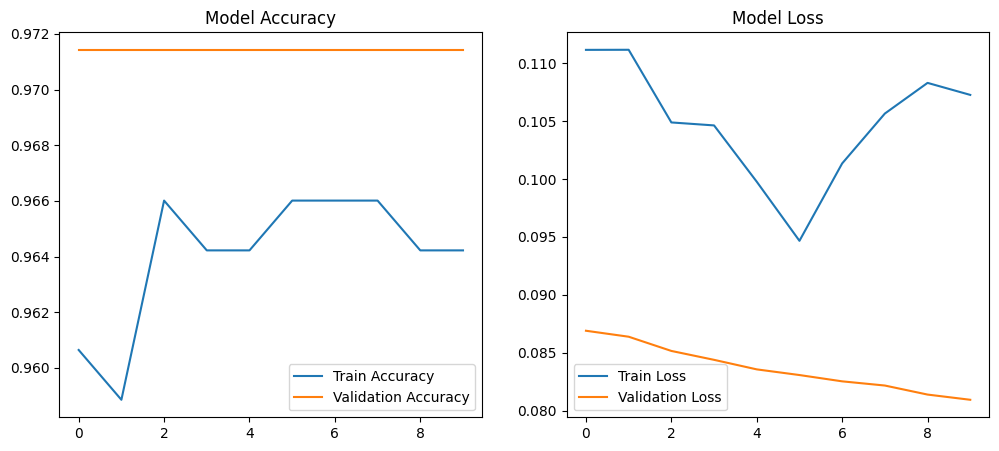

In [ ]:
history = cnn.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))

# Plot accuracy & loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

